In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('F:\DS\weight\data\HeightWeight.csv')
df.sample()

,Index,Height(Inches),Weight(Pounds)
2149,2150,66.55492,141.4402


In [4]:
# Преобразование единиц измерения
df['Height(cm)'] = df['Height(Inches)'] * 2.54  # 1 дюйм = 2.54 см
df['Weight(kg)'] = df['Weight(Pounds)'] * 0.453592  # 1 фунт = 0.453592 кг

# Удаление исходных столбцов
df = df.drop(columns=['Height(Inches)', 'Weight(Pounds)', 'Index'])
df.sample()


,Height(cm),Weight(kg)
23722,174.52627,50.854376


Корреляционная матрица:
            Height(cm)  Weight(kg)
Height(cm)    1.000000    0.502859
Weight(kg)    0.502859    1.000000


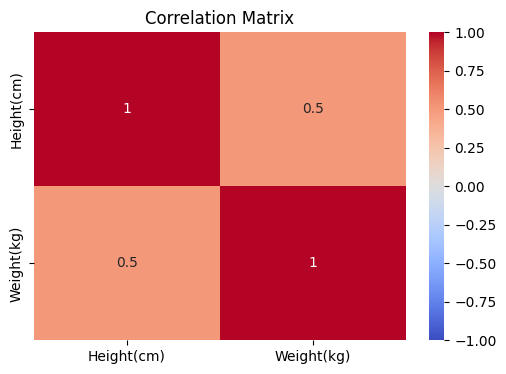

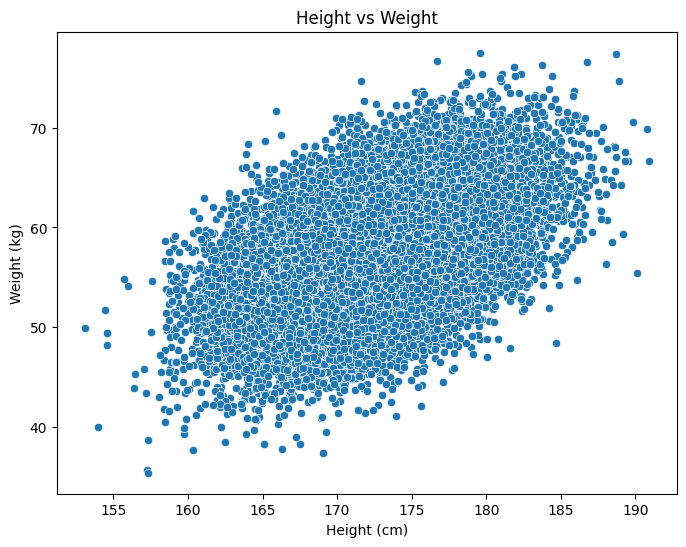

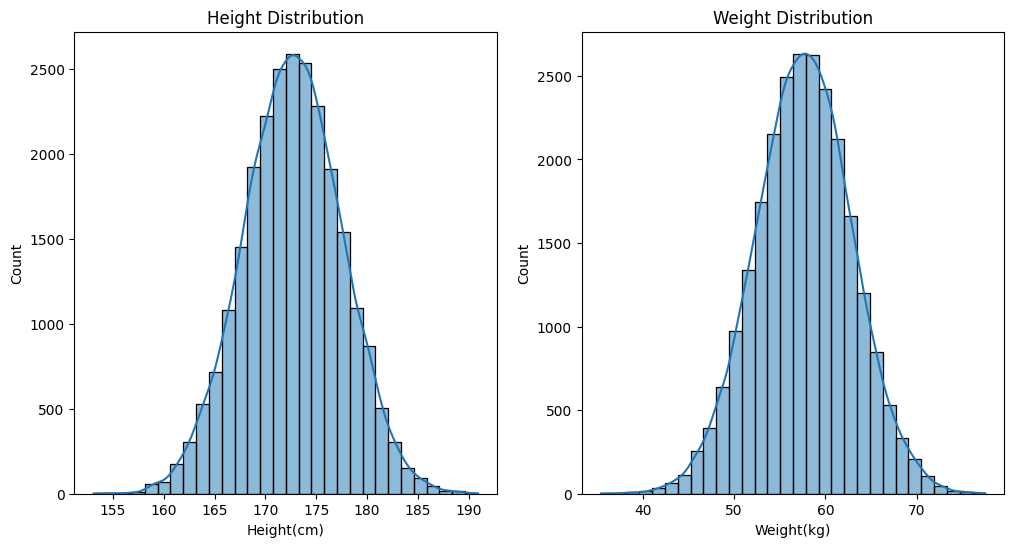

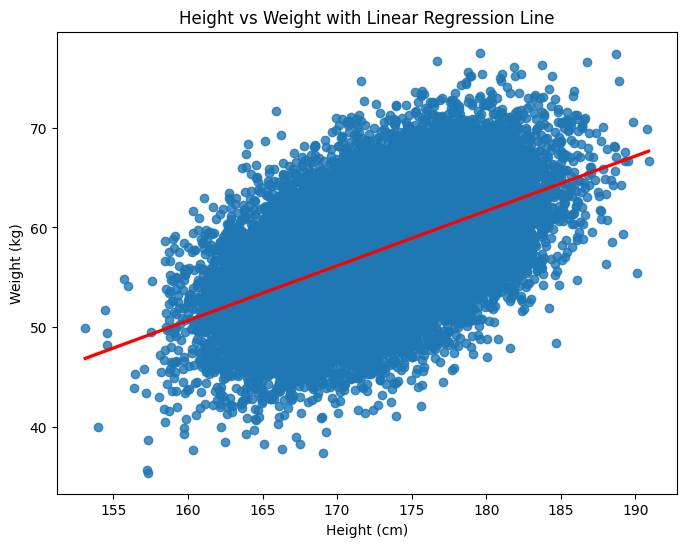

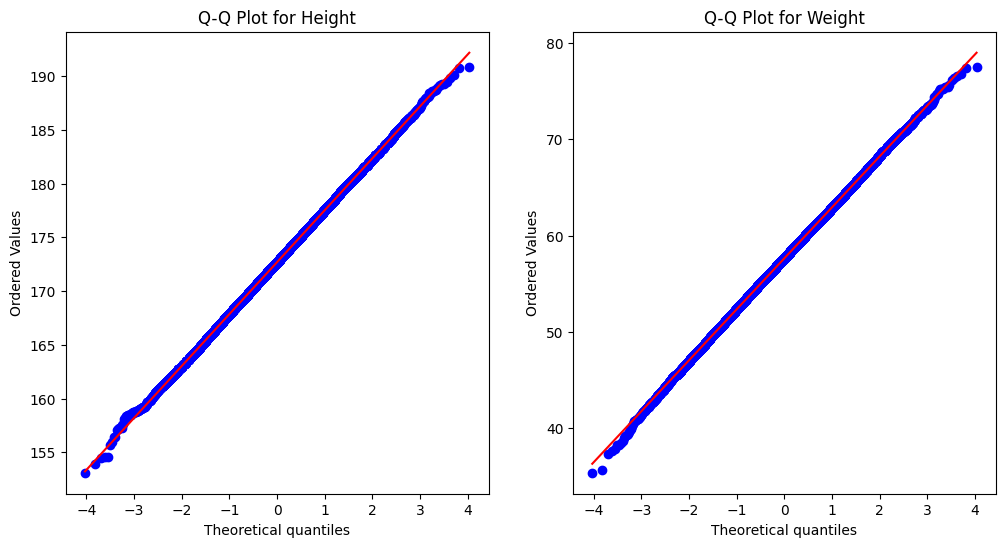

In [6]:

# 1. Матрица корреляции
corr_matrix = df.corr()
print("Корреляционная матрица:")
print(corr_matrix)

# Визуализация матрицы корреляции
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 2. Диаграмма рассеяния (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height(cm)', y='Weight(kg)', data=df)
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 3. Гистограммы распределения роста и веса
plt.figure(figsize=(12, 6))

# Гистограмма для роста
plt.subplot(1, 2, 1)
sns.histplot(df['Height(cm)'], kde=True, bins=30)
plt.title('Height Distribution')

# Гистограмма для веса
plt.subplot(1, 2, 2)
sns.histplot(df['Weight(kg)'], kde=True, bins=30)
plt.title('Weight Distribution')

plt.show()

# 4. Линейная регрессия на scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Height(cm)', y='Weight(kg)', data=df, line_kws={'color':'red'})
plt.title('Height vs Weight with Linear Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 5. Проверка нормальности данных (Q-Q Plot)
plt.figure(figsize=(12, 6))

# Q-Q plot для роста
plt.subplot(1, 2, 1)
stats.probplot(df['Height(cm)'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Height")

# Q-Q plot для веса
plt.subplot(1, 2, 2)
stats.probplot(df['Weight(kg)'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Weight")

plt.show()


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error

# Разделяем признаки и целевую переменную
X = df[['Height(cm)']]
y = df['Weight(kg)']


# Создание метрики для MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 1. Линейная регрессия
linear_model = LinearRegression()
linear_mse_scores = cross_val_score(linear_model, X, y, cv=5, scoring=mse_scorer)
linear_mse_mean = np.mean(-linear_mse_scores)
print("Linear Regression CV Mean MSE:", linear_mse_mean)

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse_scores = cross_val_score(rf_model, X, y, cv=5, scoring=mse_scorer)
rf_mse_mean = np.mean(-rf_mse_scores)
print("Random Forest CV Mean MSE:", rf_mse_mean)

# 3. XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_mse_scores = cross_val_score(xgb_model, X, y, cv=5, scoring=mse_scorer)
xgb_mse_mean = np.mean(-xgb_mse_scores)
print("XGBoost CV Mean MSE:", xgb_mse_mean)

# Вывод результатов для каждой модели
print("\nCross-Validation Results (Mean MSE):")
print(f"Linear Regression: {linear_mse_mean:.4f}")
print(f"Random Forest: {rf_mse_mean:.4f}")
print(f"XGBoost: {xgb_mse_mean:.4f}")


Linear Regression CV Mean MSE: 20.905345447212582
Random Forest CV Mean MSE: 30.626246524145216
XGBoost CV Mean MSE: 21.529916939023714

Cross-Validation Results (Mean MSE):
Linear Regression: 20.9053
Random Forest: 30.6262
XGBoost: 21.5299


In [7]:

import joblib
import os


# Обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X, y)

# Проверим точность на всех данных
predictions = linear_model.predict(X)
print("Обучение завершено. Пример предсказания для роста 175 см:", linear_model.predict([[175]])[0])

model_dir = '../models'
model_path = os.path.join(model_dir, 'linear_model.pkl')

# Проверим, что папка models существует, и создадим её, если нет
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Сохраняем модель в файл с помощью joblib
joblib.dump(linear_model, model_path)
print(f"Модель сохранена в {model_path}")


Обучение завершено. Пример предсказания для роста 175 см: 58.90731275228759
Модель сохранена в ../models\linear_model.pkl


c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
